<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/AutoEncoder_GAN_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

tf.random.set_seed(42)
np.random.seed(42)

#UnderComplete_AutoEncoder_PCA

In [2]:
#3 -> 2
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])
#2 -> 3
decoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[2])
])
autoencoder = keras.models.Sequential([
    encoder,
    decoder
])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [3]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m,3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

    return data

X_train = generate_3d_data(60)
#(3, )
#print(X_train.mean(axis=0, keepdims=0).shape)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [4]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 9ms/step - loss: 0.3131
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2919
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2724
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2553
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2375
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2207
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2049
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1896
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1756
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1616
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1488
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1371
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0.

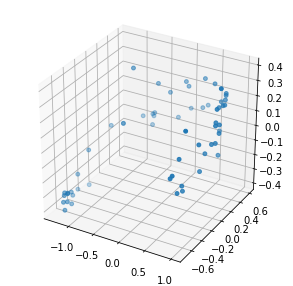

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

# scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
# 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
# marker = 점의 형태
# s = 점의 크기
# c = 점의 색깔
ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2], marker='o', s=15)

plt.show()

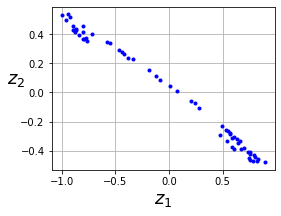

In [6]:
codings = encoder.predict(X_train)

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# StackedAutoEncoder_Fastion_MNIST

In [7]:
(X, y), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = X.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

X_train, X_valid = X[:-5000], X[-5000:]
y_train, y_valid = y[:-5000], y[-5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28]),
])

stacked_autoencoder = keras.models.Sequential([
    stacked_encoder,
    stacked_decoder
])

#binary_crossentropy 손실을 사용함. 재구성 작업을 다중 레이블 이진 분류로 다룬다.
stacked_autoencoder.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [9]:
history = stacked_autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3374 - val_loss: 0.3183
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3048 - val_loss: 0.3014
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2981 - val_loss: 0.2980
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2941 - val_loss: 0.2940
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2914 - val_loss: 0.2913
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2894 - val_loss: 0.2897
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2878 - val_loss: 0.2890
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2866 - val_loss: 0.2928
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2857 - val_loss: 0.2871
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.284

#Fashion_MNIST_Visualization

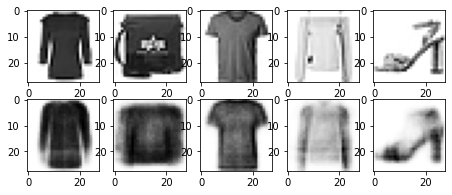

In [10]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")

show_reconstructions(stacked_autoencoder)

#Dimention_Reduction_AutoEncoder_And_TSEN

In [11]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
#정규화
X_valid_2D_norm = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


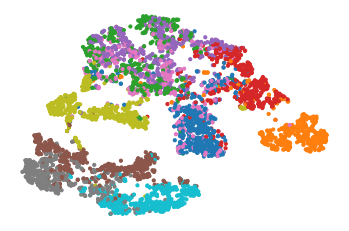

In [12]:
plt.scatter(X_valid_2D_norm[:, 0], X_valid_2D_norm[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

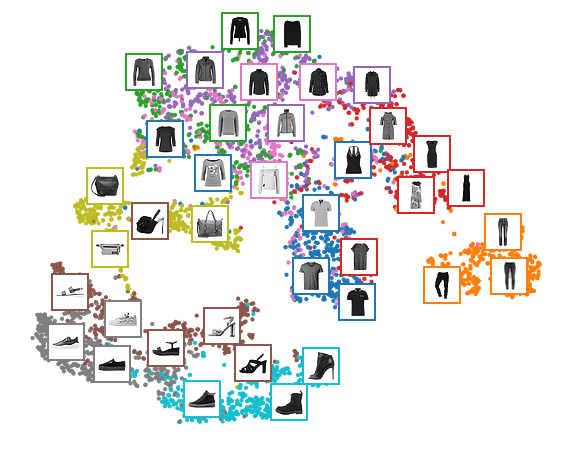

In [13]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10

plt.scatter(X_valid_2D_norm[:, 0], X_valid_2D_norm[:, 1], c=y_valid, s=10, cmap="tab10")
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D_norm):
    #점하나하나 펼쳐진 모든 이미지와의 거리를 구해서 어느정도 특정 거리 이상이면 그 점에 해당하는 이미지를 보여줌
    dist = np.sum((position - image_positions) ** 2, axis=1)

    if np.min(dist) > 0.01: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

# Weights_Shared

In [14]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        #transpose_b = True -> 두번째 행렬을 전치시키고 곱함
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [15]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_crossentropy(tf.round(y_true), tf.round(y_pred))

In [16]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [17]:
stacked_autoencoder.summary()
print()
tied_ae.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 30)                81530     
                                                                 
 sequential_4 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82414     
                                                                 
Total params: 82,414
Trai

In [18]:
history = tied_ae.fit(X_train, X_train, epochs=20,
                      validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3269 - rounded_accuracy: 1.5963 - val_loss: 0.3082 - val_rounded_accuracy: 1.4211
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2975 - rounded_accuracy: 1.1923 - val_loss: 0.2951 - val_rounded_accuracy: 1.0971
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2920 - rounded_accuracy: 1.1142 - val_loss: 0.3023 - val_rounded_accuracy: 1.4227
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2889 - rounded_accuracy: 1.0720 - val_loss: 0.2880 - val_rounded_accuracy: 1.0245
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2865 - rounded_accuracy: 1.0369 - val_loss: 0.2874 - val_rounded_accuracy: 1.0553
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2850 - rounded_accuracy: 1.0138 - val_loss: 0.2861 - val_rounded_accuracy: 0.9919
Epoch 7/20
1719/1719 [==================

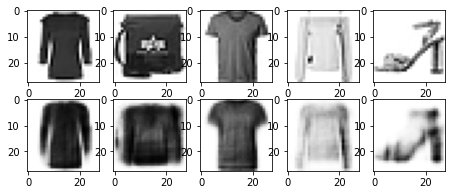

In [19]:
show_reconstructions(tied_ae)
plt.show()

# Greedy_Layerwise_AutoEncoder_Training

In [20]:
K = keras.backend

X_train_flatten = K.batch_flatten(X_train)
X_valid_flatten = K.batch_flatten(X_valid)

In [21]:
#784 -> 100
enc1 = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[28*28], activation='selu'),
])
#100 -> 784
dec1 = keras.models.Sequential([
    keras.layers.Dense(28*28, input_shape=[100], activation='sigmoid'),
])
ae_1 = keras.models.Sequential([
    enc1,
    dec1,
])
ae_1.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
ae_1.fit(X_train_flatten, X_train_flatten, epochs=10, validation_data=[X_valid_flatten, X_valid_flatten])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3440 - rounded_accuracy: 1.7198 - val_loss: 0.3111 - val_rounded_accuracy: 1.2885
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3027 - rounded_accuracy: 1.2042 - val_loss: 0.2994 - val_rounded_accuracy: 1.1415
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2940 - rounded_accuracy: 1.0822 - val_loss: 0.2926 - val_rounded_accuracy: 1.0429
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2885 - rounded_accuracy: 1.0010 - val_loss: 0.2882 - val_rounded_accuracy: 0.9699
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2847 - rounded_accuracy: 0.9459 - val_loss: 0.2851 - val_rounded_accuracy: 0.9244
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2821 - rounded_accuracy: 0.9063 - val_loss: 0.2828 - val_rounded_accuracy: 0.8970
Epoch 7/10
1719/1719 [==================

In [22]:
X_train_enc1 = enc1(X_train_flatten)
X_valid_enc1 = enc1(X_valid_flatten)

In [23]:
#100 -> 30
enc2 = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=[100], activation='selu'),
])
#30 -> 100
dec2 = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[30], activation='selu'),
])
ae_2 = keras.models.Sequential([
    enc2,
    dec2,
])
ae_2.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.05))
ae_2.fit(X_train_enc1, X_train_enc1, epochs=10, validation_data=[X_valid_enc1, X_valid_enc1])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6558 - val_loss: 0.3723
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3056 - val_loss: 0.2855
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2640 - val_loss: 0.2594
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2509 - val_loss: 0.2405
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2325 - val_loss: 0.2201
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2206 - val_loss: 0.2170
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2171 - val_loss: 0.2196
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2146 - val_loss: 0.2231
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2141 - val_loss: 0.2132
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.212

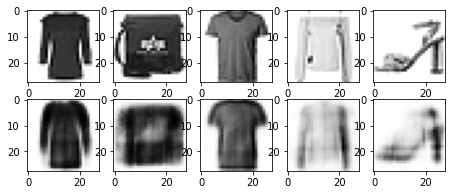

In [26]:
stacked_ae = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])
show_reconstructions(stacked_ae)
plt.show()

In [28]:
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2869 - rounded_accuracy: 1.0138 - val_loss: 0.2885 - val_rounded_accuracy: 1.0115
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2865 - rounded_accuracy: 1.0067 - val_loss: 0.2881 - val_rounded_accuracy: 1.0058
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2862 - rounded_accuracy: 1.0018 - val_loss: 0.2879 - val_rounded_accuracy: 1.0054
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2860 - rounded_accuracy: 0.9978 - val_loss: 0.2877 - val_rounded_accuracy: 0.9954
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2858 - rounded_accuracy: 0.9940 - val_loss: 0.2875 - val_rounded_accuracy: 0.9923
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2856 - rounded_accuracy: 0.9910 - val_loss: 0.2873 - val_rounded_accuracy: 0.9953
Epoch 7/10
1719/1719 [==================

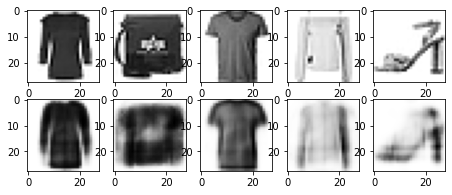

In [30]:
show_reconstructions(stacked_ae)
plt.show()

# Convolutional_Autoencoder

In [57]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3008 - rounded_accuracy: 1.2264 - val_loss: 0.2825 - val_rounded_accuracy: 1.0327
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2749 - rounded_accuracy: 0.8886 - val_loss: 0.2731 - val_rounded_accuracy: 0.8611
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2704 - rounded_accuracy: 0.8195 - val_loss: 0.2698 - val_rounded_accuracy: 0.7810
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2678 - rounded_accuracy: 0.7791 - val_loss: 0.2671 - val_rounded_accuracy: 0.7469
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2661 - rounded_accuracy: 0.7513 - val_loss: 0.2662 - val_rounded_accuracy: 0.7355


In [58]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_16 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 64)        

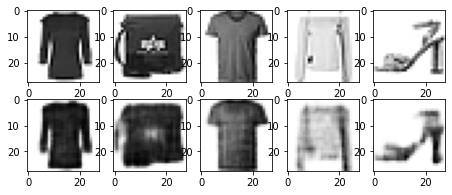

In [59]:
show_reconstructions(conv_ae)
plt.show()